<a href="https://colab.research.google.com/github/Monazshaik/stat/blob/main/stat_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Generate random data for heights and weights
np.random.seed(0)
heights = np.random.normal(170, 10, 50)  # Mean = 170, Standard Deviation = 10
weights = np.random.normal(70, 15, 50)    # Mean = 70, Standard Deviation = 15


Descriptive Statistics:

In [2]:
# Calculating descriptive statistics
heights_mean = np.mean(heights)
heights_median = np.median(heights)
heights_std = np.std(heights)
heights_range = np.max(heights) - np.min(heights)

weights_mean = np.mean(weights)
weights_median = np.median(weights)
weights_std = np.std(weights)
weights_range = np.max(weights) - np.min(weights)

print("Heights:")
print("Mean:", heights_mean)
print("Median:", heights_median)
print("Standard Deviation:", heights_std)
print("Range:", heights_range)

print("\nWeights:")
print("Mean:", weights_mean)
print("Median:", weights_median)
print("Standard Deviation:", weights_std)
print("Range:", weights_range)


Heights:
Mean: 171.405592723131
Median: 171.494954984289
Standard Deviation: 11.255229205548462
Range: 48.227444398216875

Weights:
Mean: 69.68585138133808
Median: 70.81083053519413
Standard Deviation: 13.006045483866448
Range: 54.3325766754339


Probability:

In [3]:
prob_taller_than_175 = np.sum(heights > 175) / len(heights)
print("Probability of a person being taller than 175 cm:", prob_taller_than_175)


Probability of a person being taller than 175 cm: 0.34


Distributions:

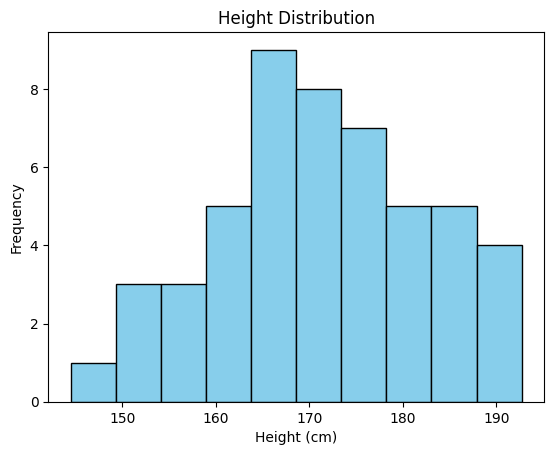

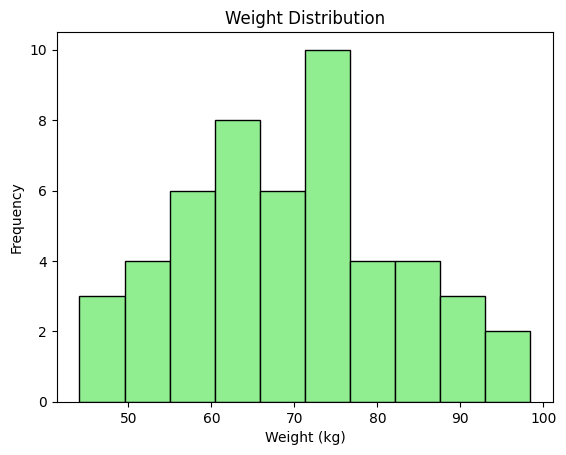

In [4]:
plt.hist(heights, bins=10, color='skyblue', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

plt.hist(weights, bins=10, color='lightgreen', edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()


Inferential Statistics - Central Limit Theorem (CLT):

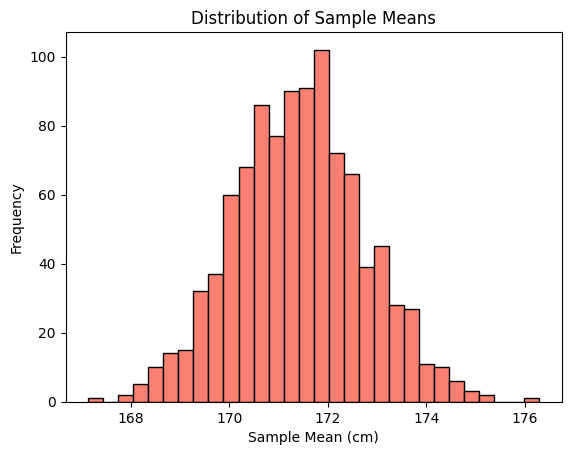

In [5]:
sample_means = []

for _ in range(1000):
    sample = np.random.choice(heights, size=30, replace=False)
    sample_means.append(np.mean(sample))

plt.hist(sample_means, bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean (cm)')
plt.ylabel('Frequency')
plt.show()


Confidence Intervals (CI)

In [6]:
confidence_interval = t.interval(0.95, len(heights)-1, loc=np.mean(heights), scale=heights_std/np.sqrt(len(heights)))
print("95% Confidence Interval for Height Mean:", confidence_interval)


95% Confidence Interval for Height Mean: (168.20689197923264, 174.60429346702938)


Hypothesis Testing

In [7]:
from scipy.stats import ttest_1samp

# Population mean
population_mean = 170

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(heights, population_mean)

print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: 0.8741846907095127
p-value: 0.3862822137609324


Critical Regions, Level of Significance, and Error Types

In [8]:
from scipy.stats import t

# Define the significance level
alpha = 0.05

# Degrees of freedom (n-1)
degrees_of_freedom = len(heights) - 1

# Calculate the critical t-value for a two-tailed test
critical_t_value = t.ppf(1 - alpha/2, degrees_of_freedom)

print("Critical t-value for a two-tailed test with alpha =", alpha, ":", critical_t_value)

# Calculate the rejection region
lower_critical_region = -critical_t_value
upper_critical_region = critical_t_value

print("Rejection region (Critical region):")
print("Lower critical region:", lower_critical_region)
print("Upper critical region:", upper_critical_region)


Critical t-value for a two-tailed test with alpha = 0.05 : 2.009575234489209
Rejection region (Critical region):
Lower critical region: -2.009575234489209
Upper critical region: 2.009575234489209


Choosing P-values from Tables

In [9]:
# Calculate the p-value for the one-sample t-test
p_value = t.cdf(t_statistic, degrees_of_freedom) * 2

print("p-value:", p_value)

# Decision based on p-value
if p_value < alpha:
    print("Reject the null hypothesis. The mean height of the population is significantly different from 170 cm.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that the mean height of the population is different from 170 cm.")


p-value: 1.6137177862390675
Fail to reject the null hypothesis. There is no significant evidence to suggest that the mean height of the population is different from 170 cm.


Feature Selection Using P-values

In [10]:
import statsmodels.api as sm

# Add constant term for the intercept
X = sm.add_constant(weights)

# Fit the linear regression model
model = sm.OLS(heights, X).fit()

# Get p-value for the weight coefficient
p_value_weight = model.pvalues[1]

print("p-value for weight coefficient:", p_value_weight)

# Decision based on p-value
alpha = 0.05

if p_value_weight < alpha:
    print("Reject the null hypothesis. Weight is a significant predictor of height.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that weight is a predictor of height.")


p-value for weight coefficient: 0.6830946622054956
Fail to reject the null hypothesis. There is no significant evidence to suggest that weight is a predictor of height.
